In [19]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch12. 데이터시각화 </font>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도 시각화)
  * matplotlib : 파이썬에서 가장 쉽고 많이 쓰는 시각화 라이브러리. 판다스 내부에 포함
  * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby
 
 # 1절 matplotlib
 - https://pypi.org/project/matplotlib/
 - https://matplotlib.org/stable/api/index

In [20]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
# 한글설정

# warning(경고) 안보이게



## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

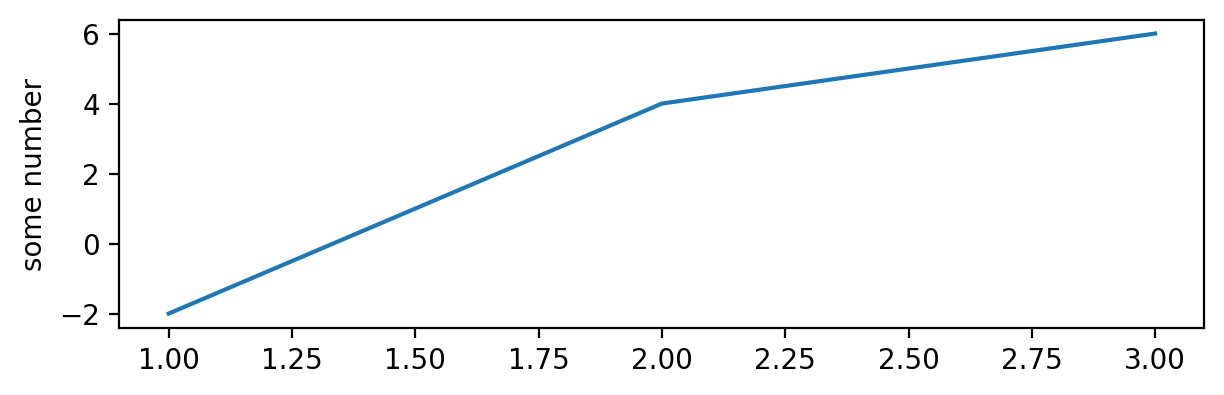

In [4]:
x = [1, 2, 3] # 1) 데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성
plt.plot(x, y) # 3) 그래프 함수
plt.ylabel('some number') # 4) 커스터마이징
plt.show() # 5) 그래프 화면 출력 cf)plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [5]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

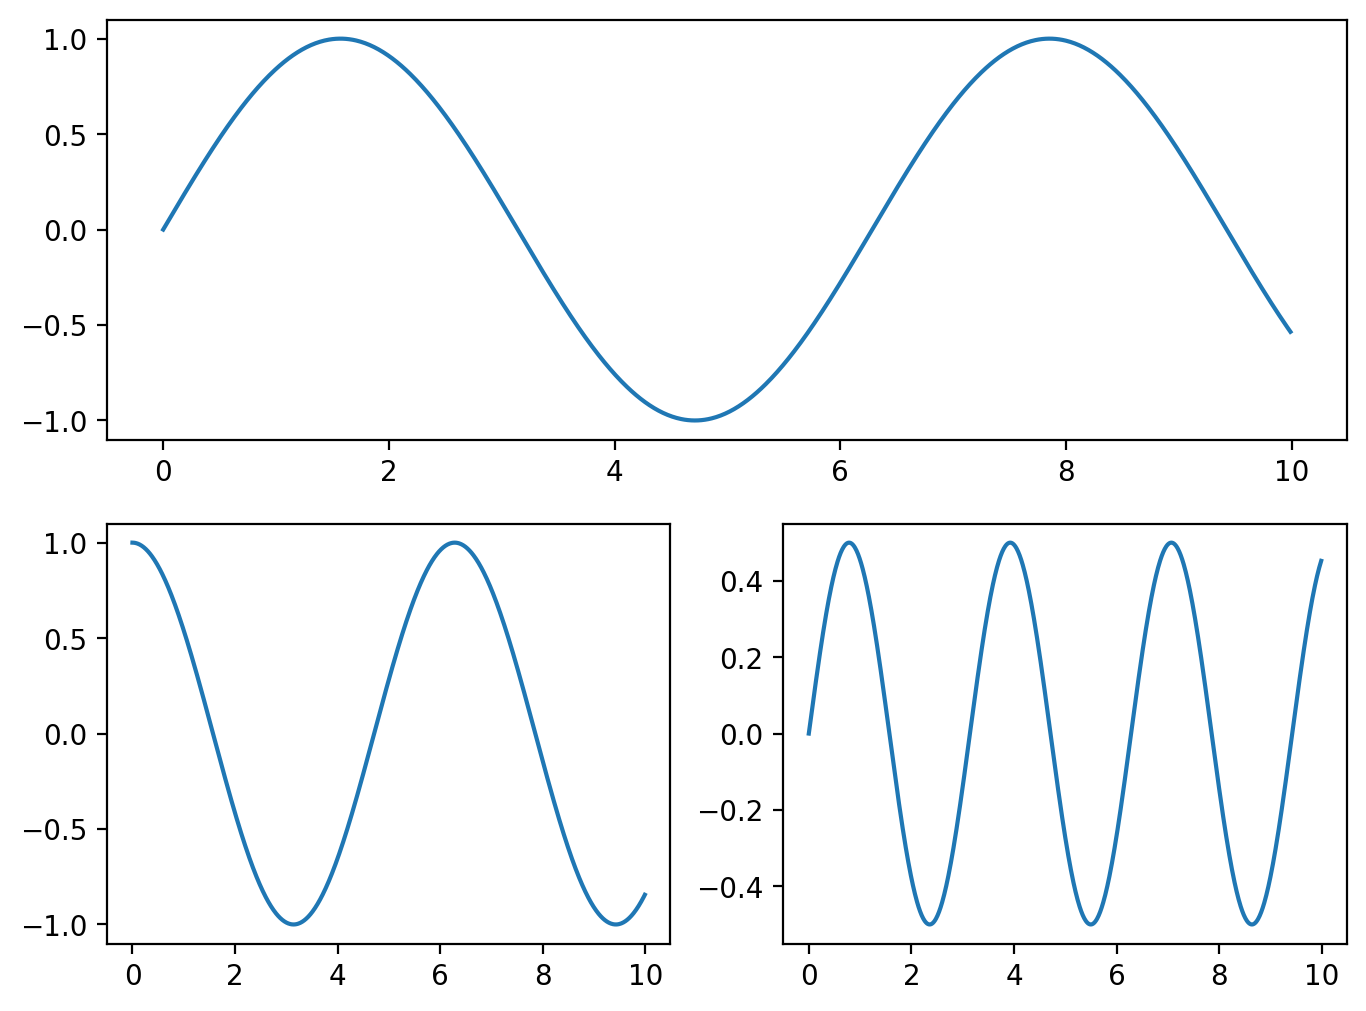

In [6]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x)) # 2행 1열의 그래프의 첫번째 그래프.
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x)*np.cos(x))

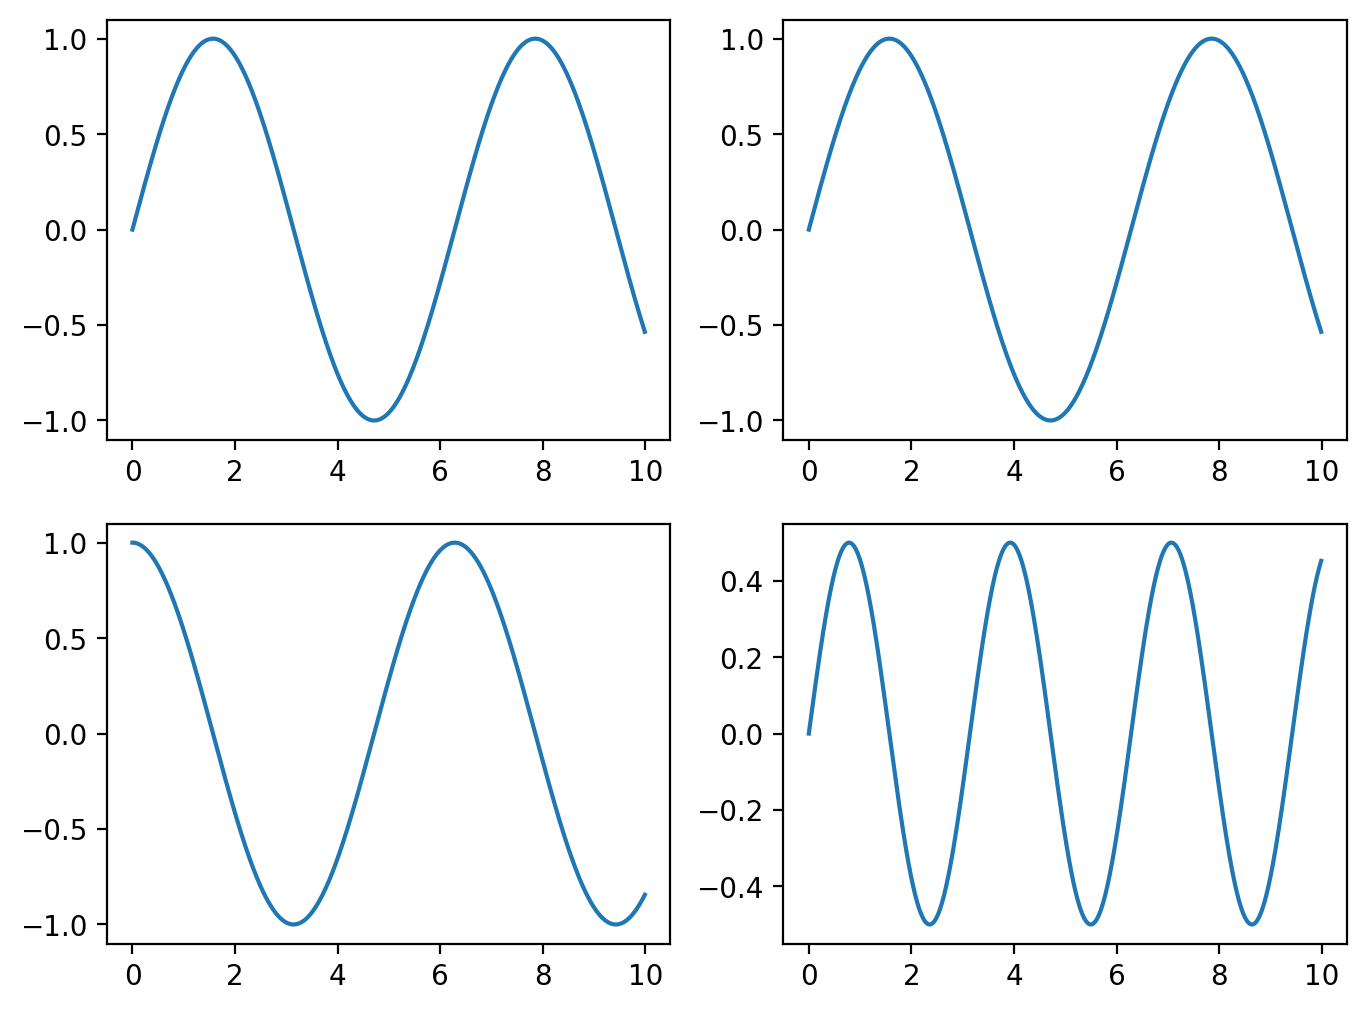

In [7]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x)) # 2행 1열의 그래프의 첫번째 그래프.
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots() 함수로 서브플롯 추가
- 교안(14p) : https://wikidocs.net/92085

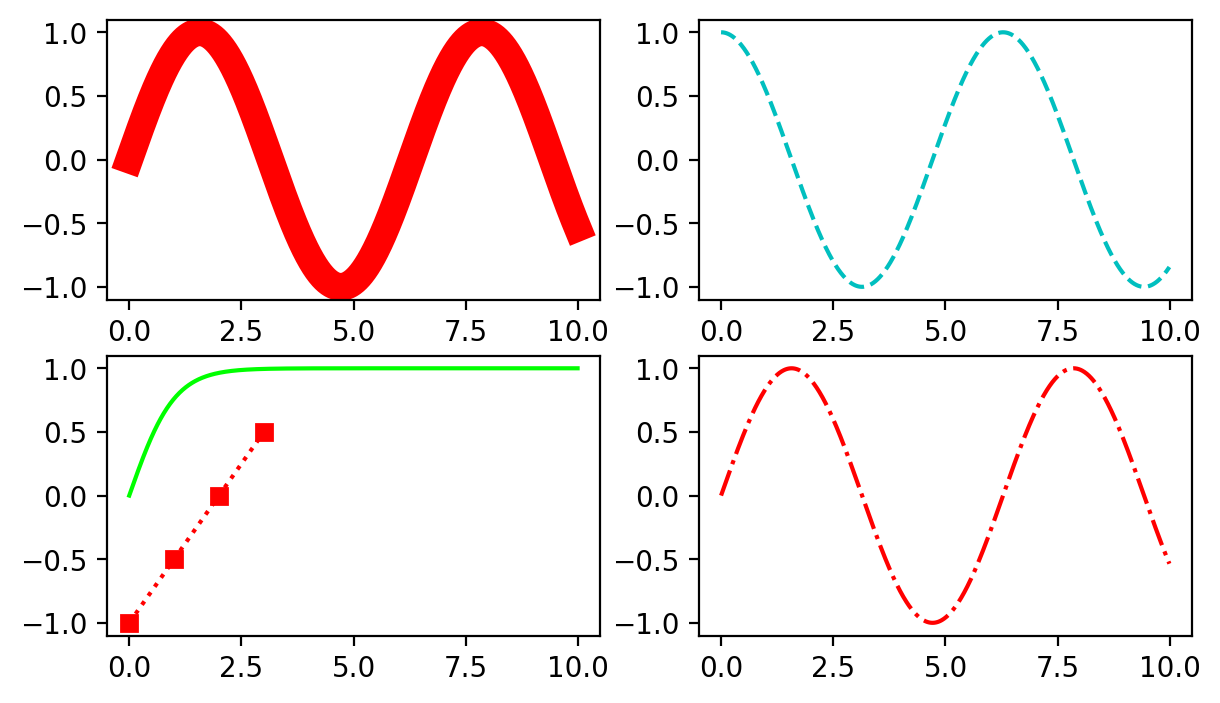

In [15]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # color='c--, linestyle=':', '--', '-'
axes[1,0].plot([0,1,2,3], [-1, -0.5, 0, 0.5], 'rs:') # color='r', marker='o'
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')

plt.show()

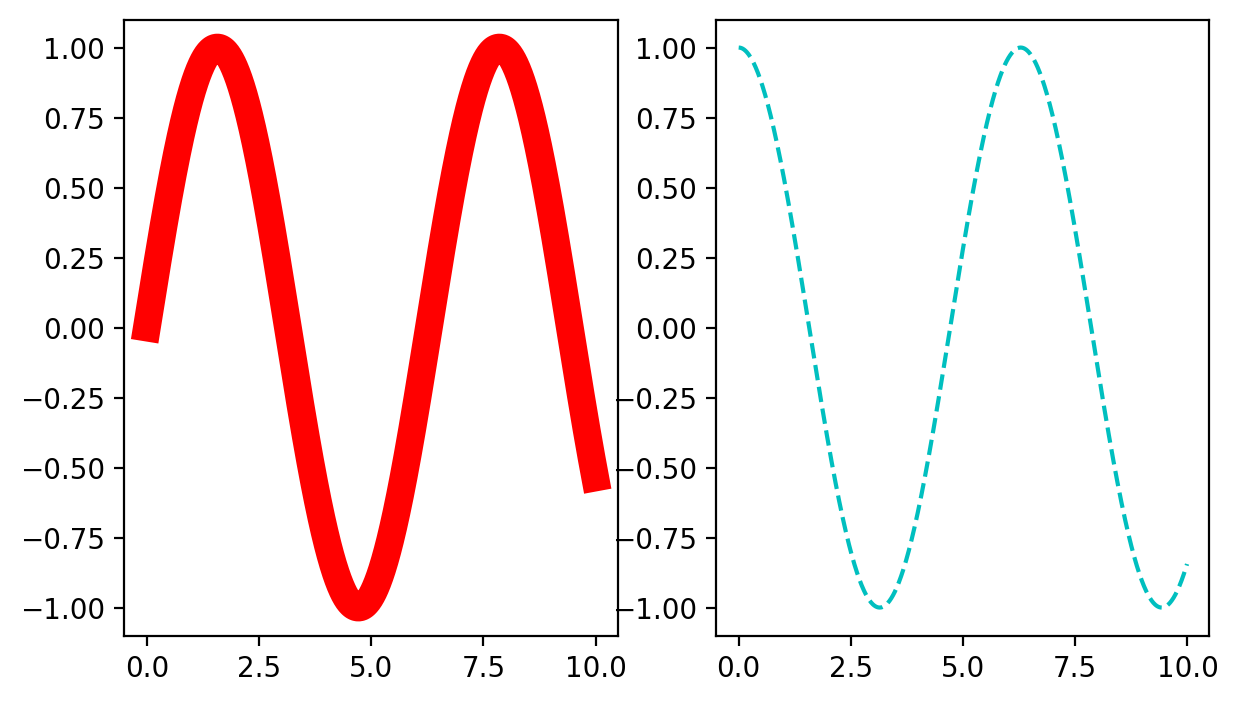

In [18]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7,4))
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--') # color='c--, linestyle=':', '--', '-'

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density, ...
    * xlim, ylim : list/tuple

In [23]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [ ]:
# 범례사용 https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

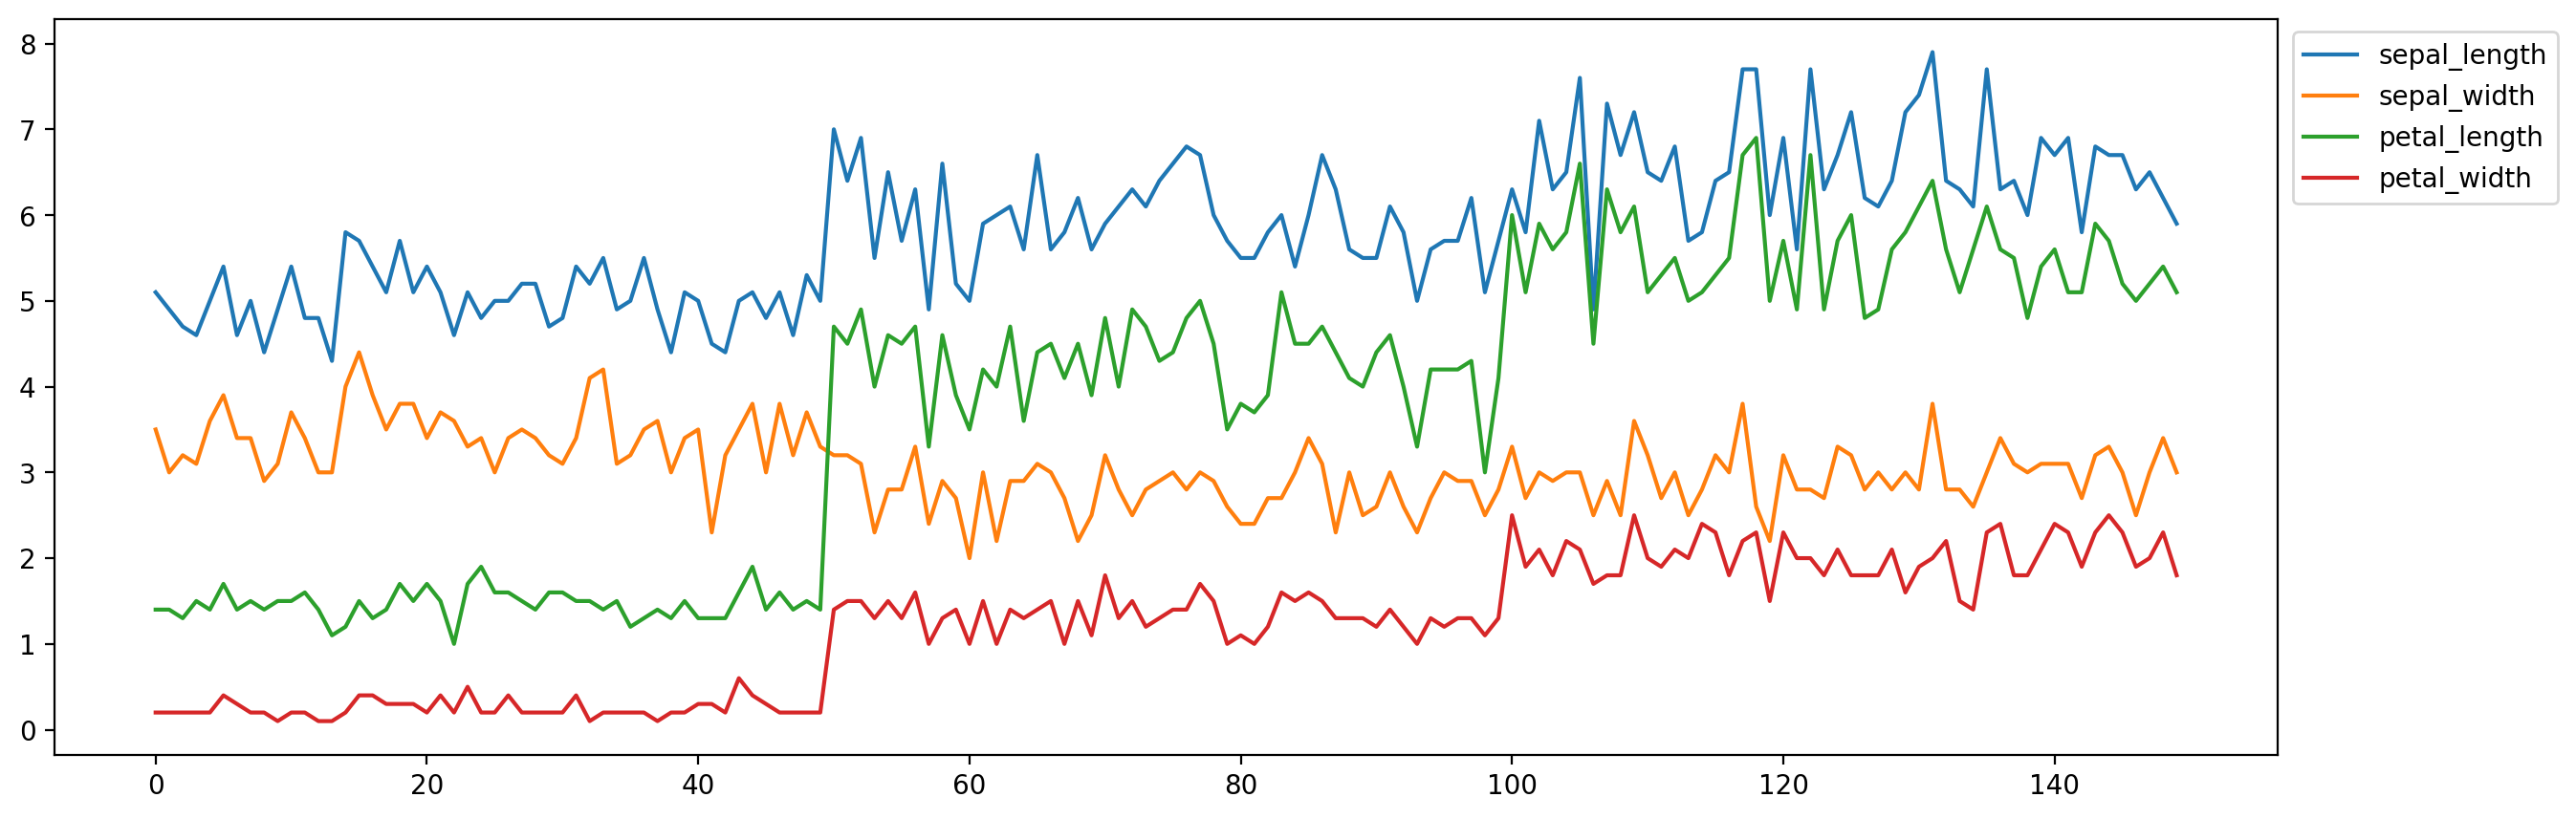

In [41]:
ax = iris.plot(kind='line', figsize=(15,5))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.001, 1))
plt.savefig('data/ch12_iris.jpg')
plt.show()

In [42]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


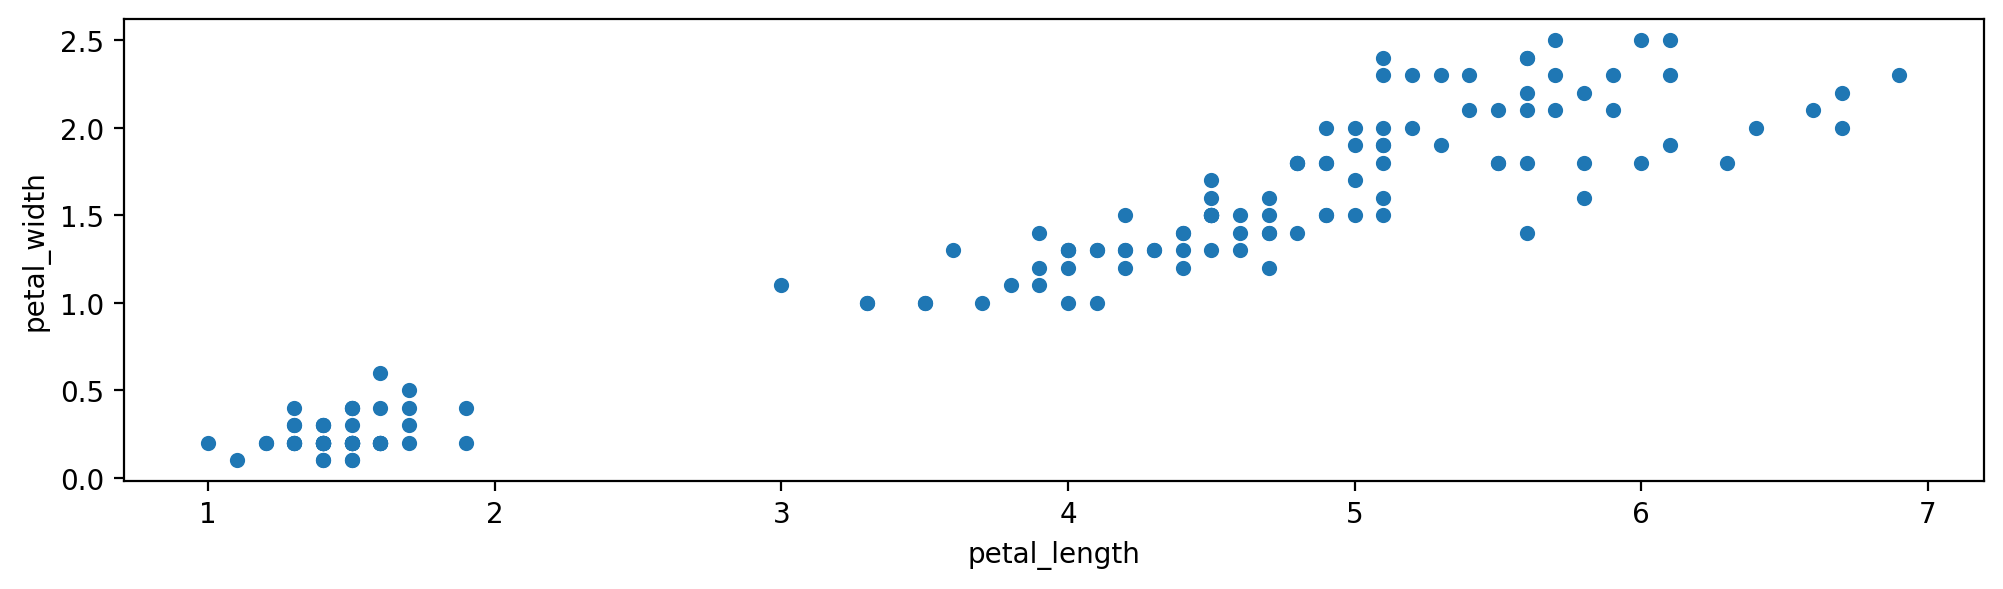

In [43]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

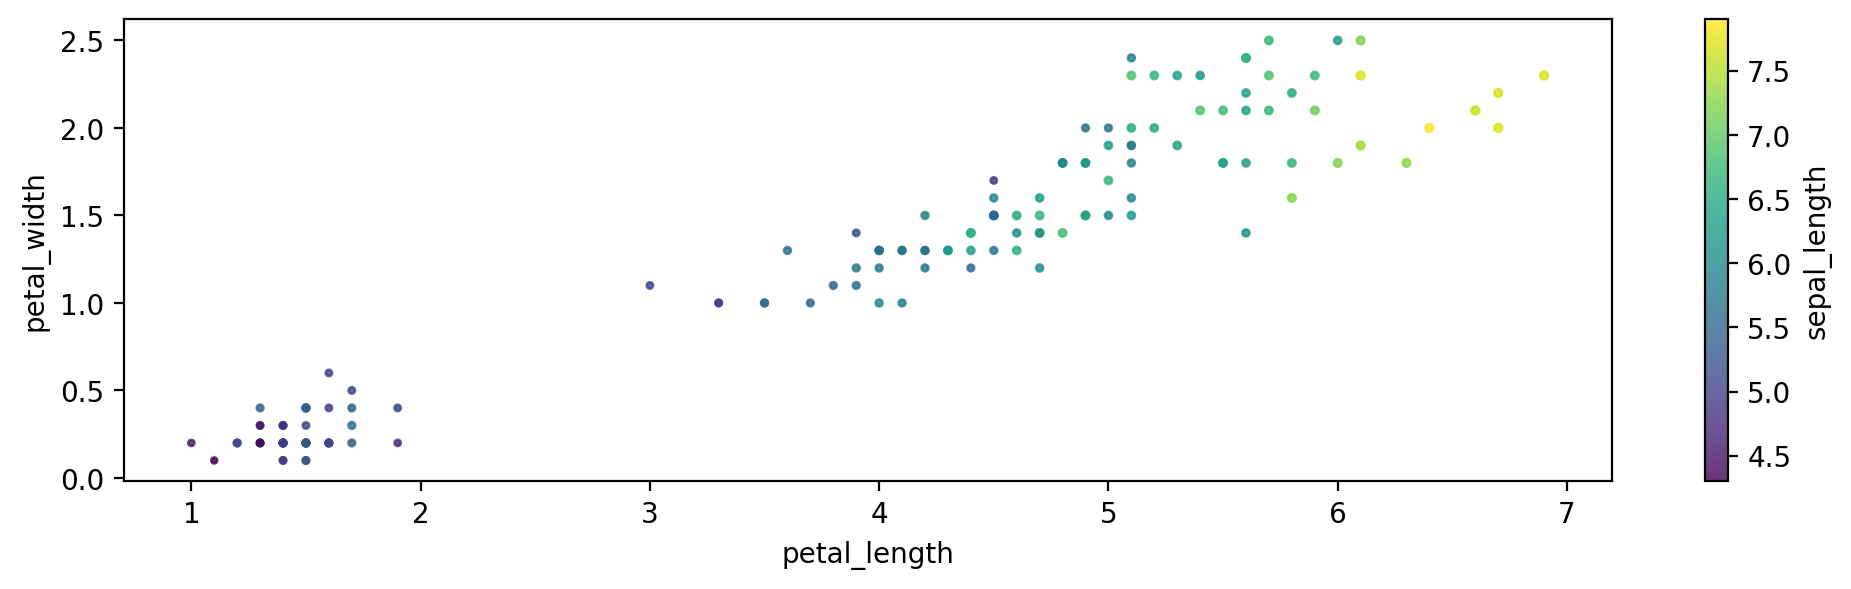

In [47]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length', # size
         c='sepal_length', # color
         alpha=.8) # 0<= 투명도 <=1
plt.show()

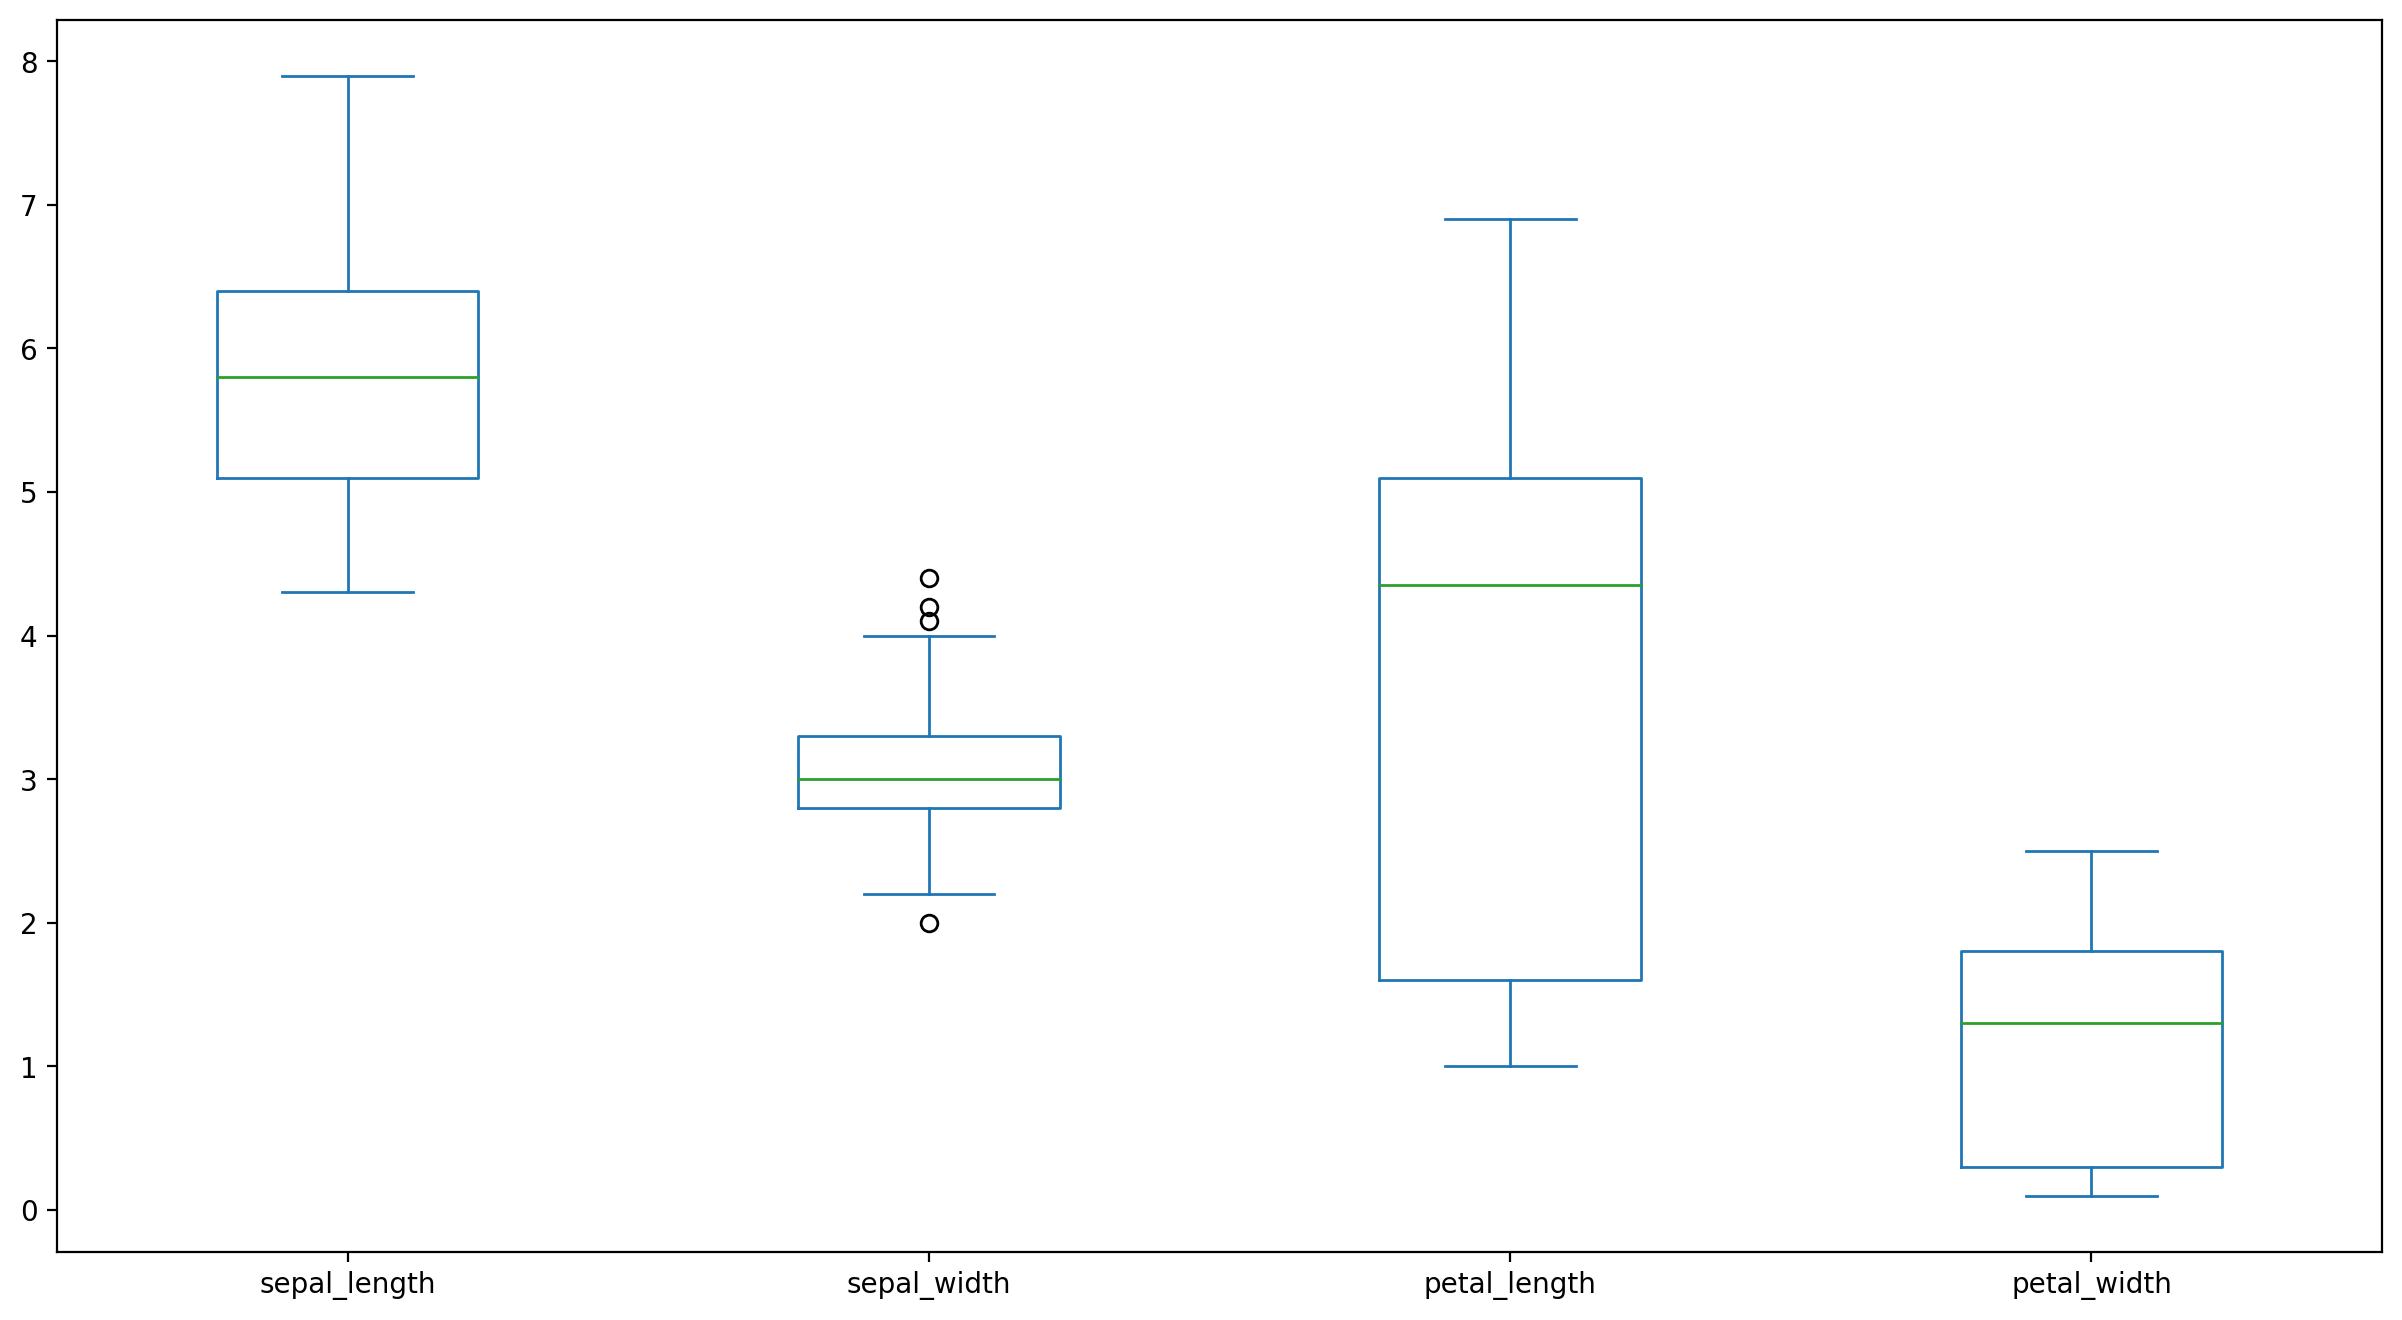

In [49]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(15,8))
plt.show()

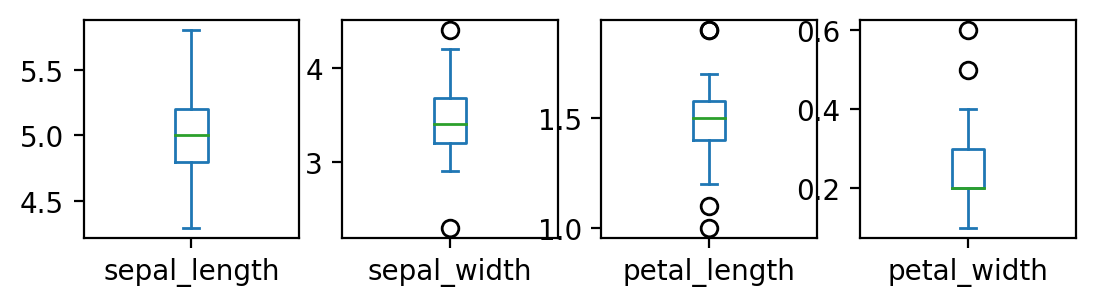

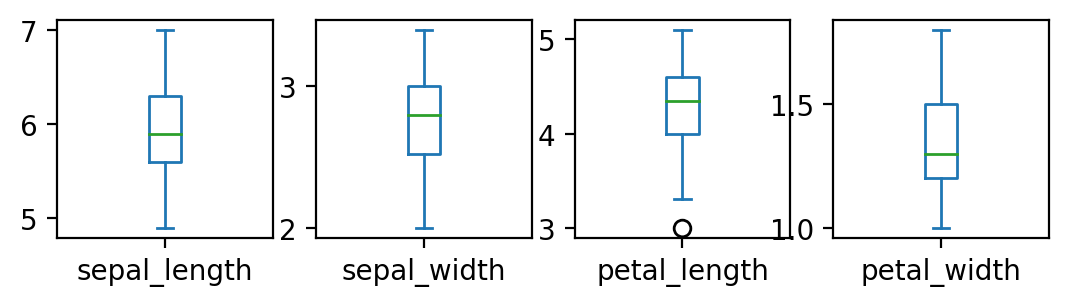

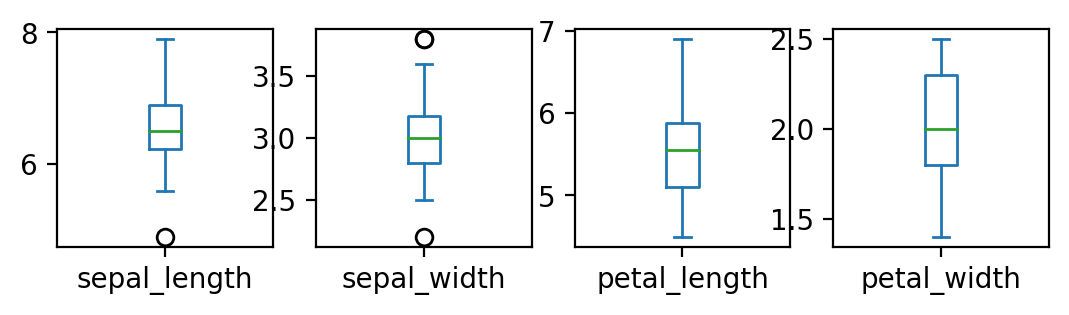

In [62]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharex=True)
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

### 1) plt.scatter() : 산점도

In [106]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


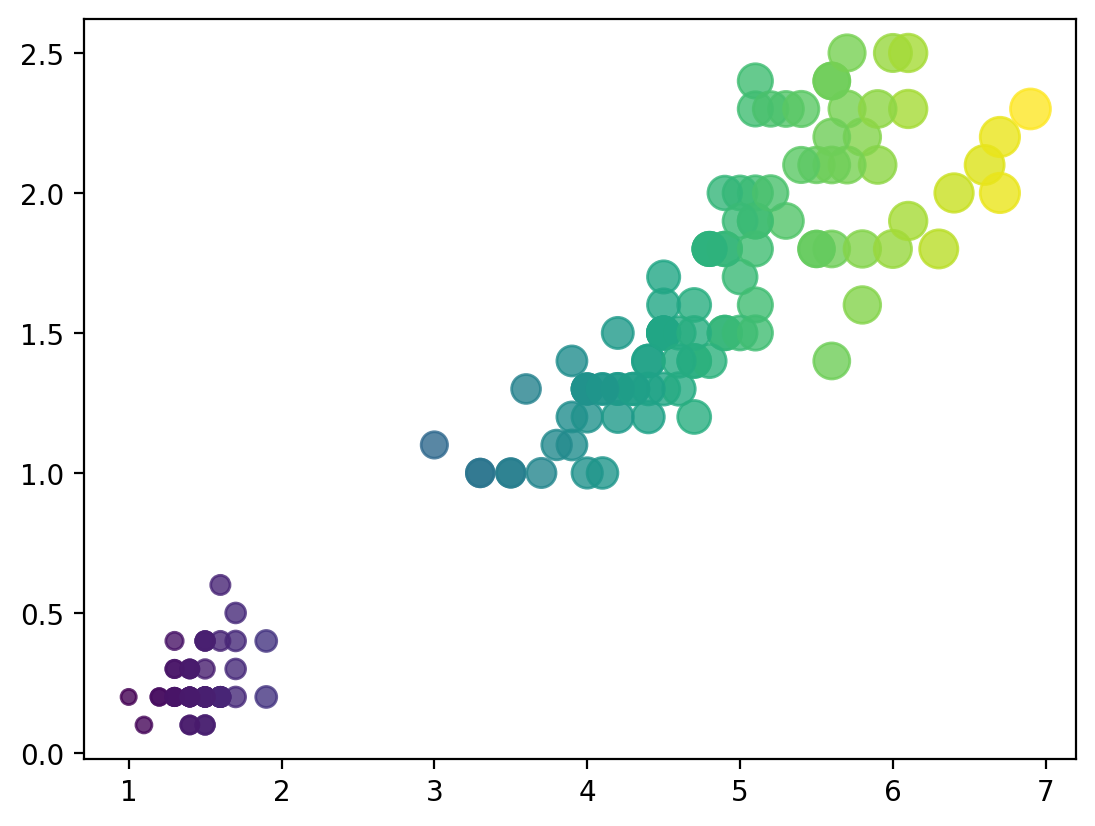

In [105]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.sepal_width*30,
           c=iris.petal_length*20,
           alpha=.8)
# petal_length, petal_width에 따른 sepal_width의 값이 비례한다는 것을 시각화 하기 위해
# 점의 size를 sepal_width의 값으로 넣음

### 2) boxplot(단점:분포를 모른다), violinplot(이상치를 모른다)

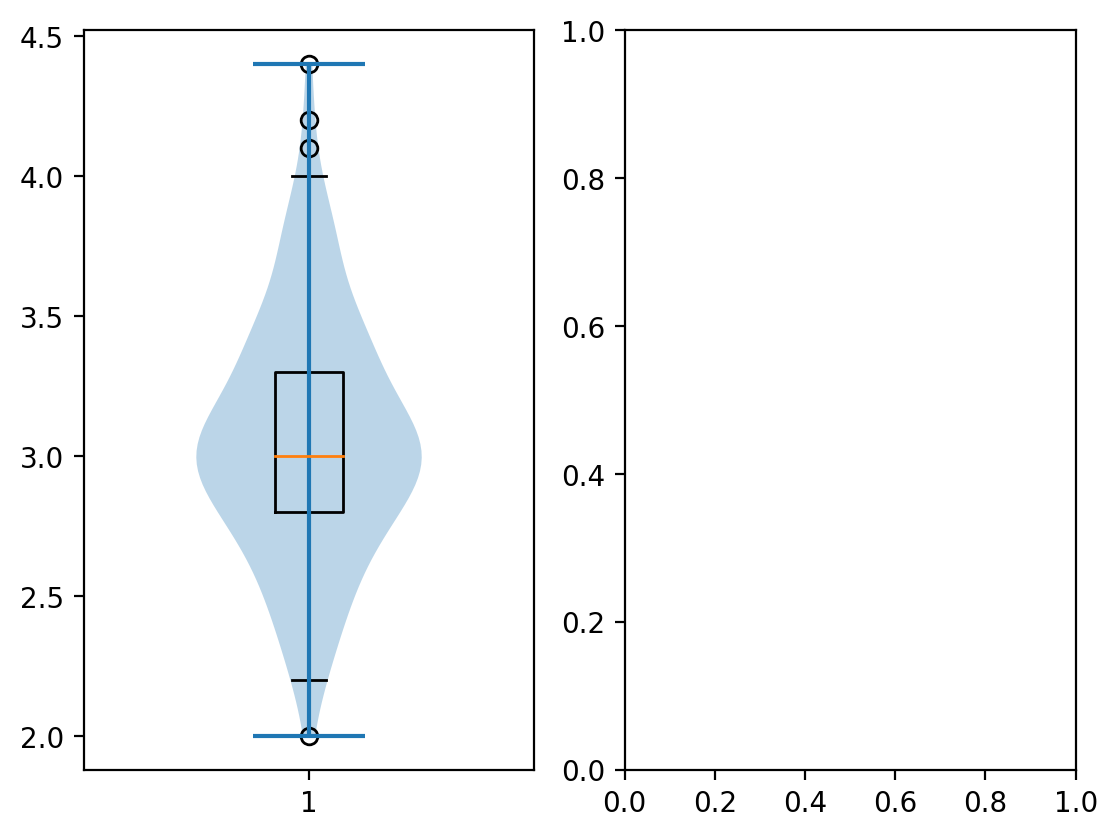

In [69]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[0].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

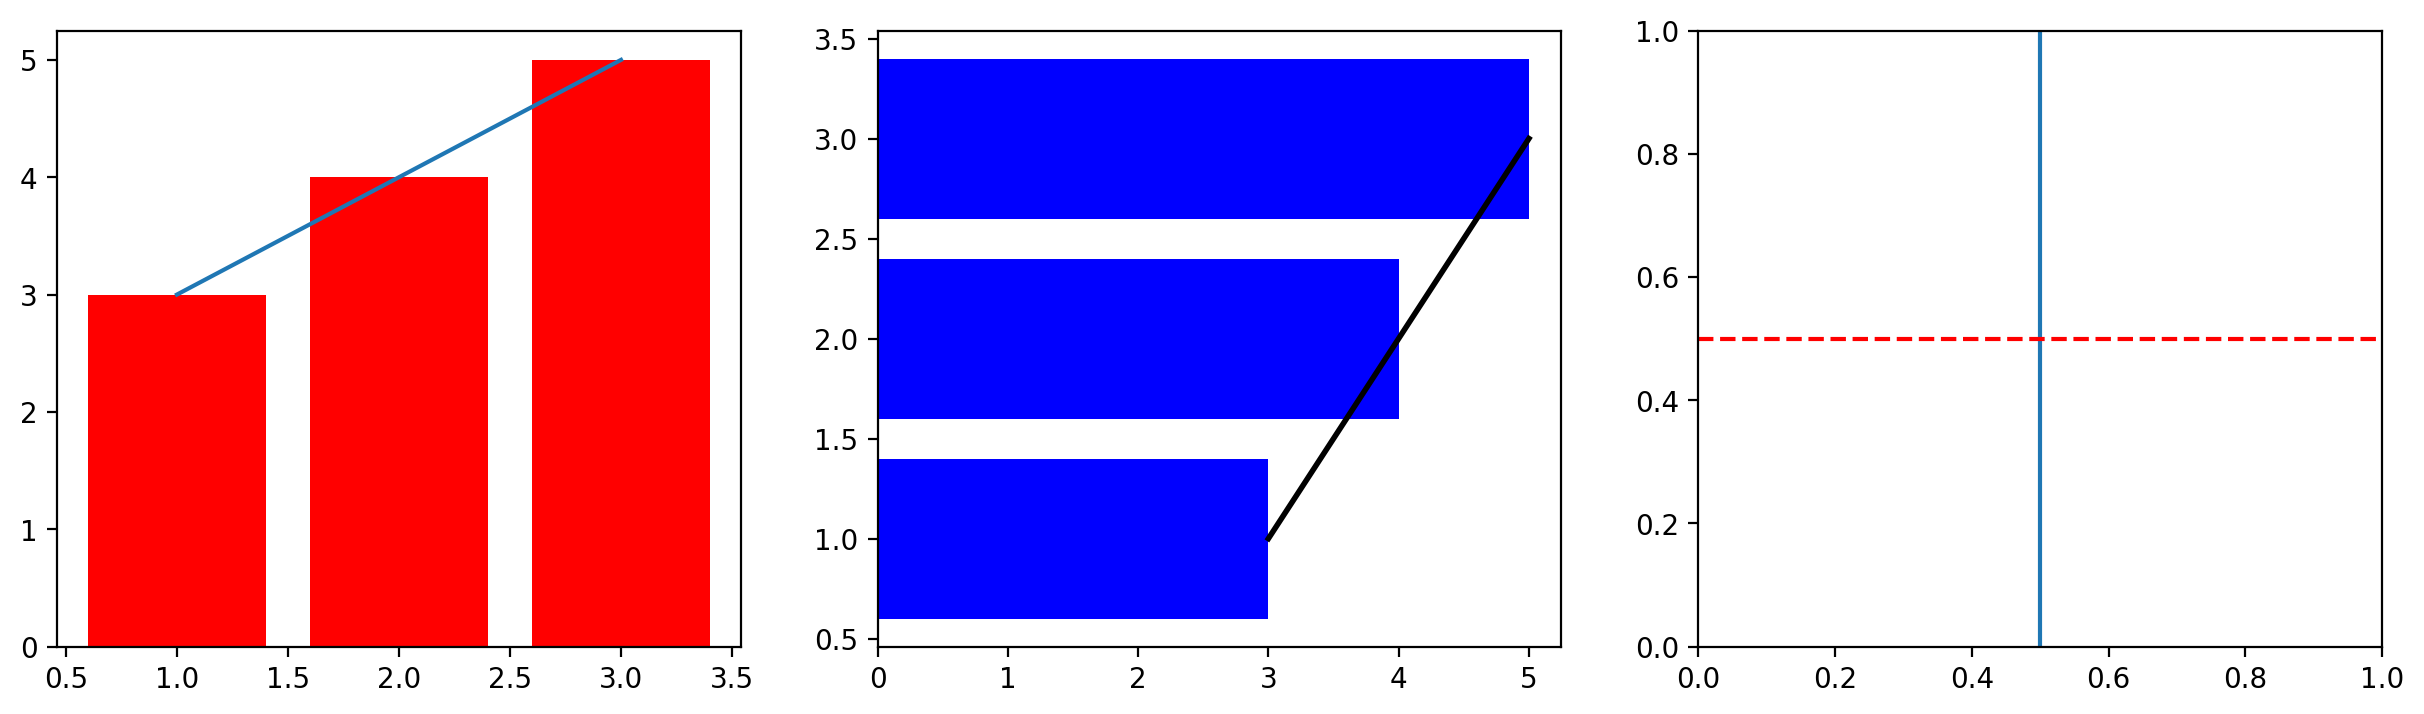

In [78]:
x=[1,2,3]
y=[3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='b')
axes[1].plot(y, x, 'k', linewidth=2) # k:black
axes[2].axvline(0.5)
axes[2].axhline(0.5, c='r', linestyle='--')

### 4) hist(도수분포표; histogram)

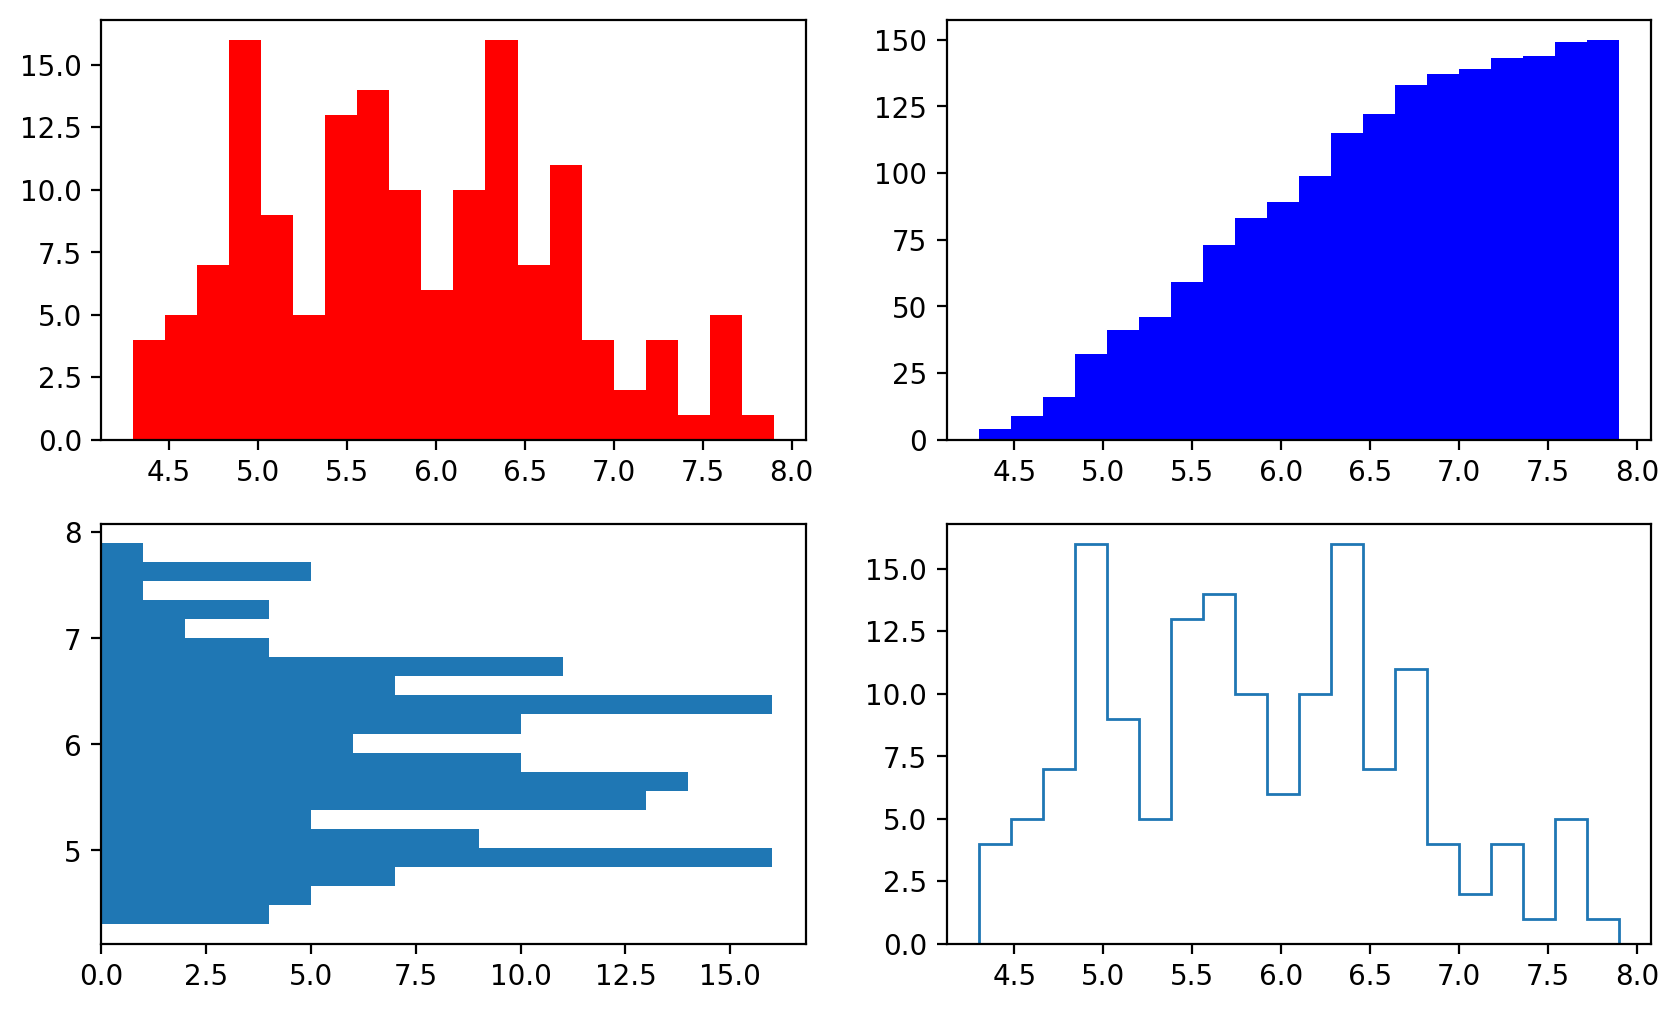

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, color='b', cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평 히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') # 
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker... (plot의 매개변수로 지정)
### 2) text(), annotate()

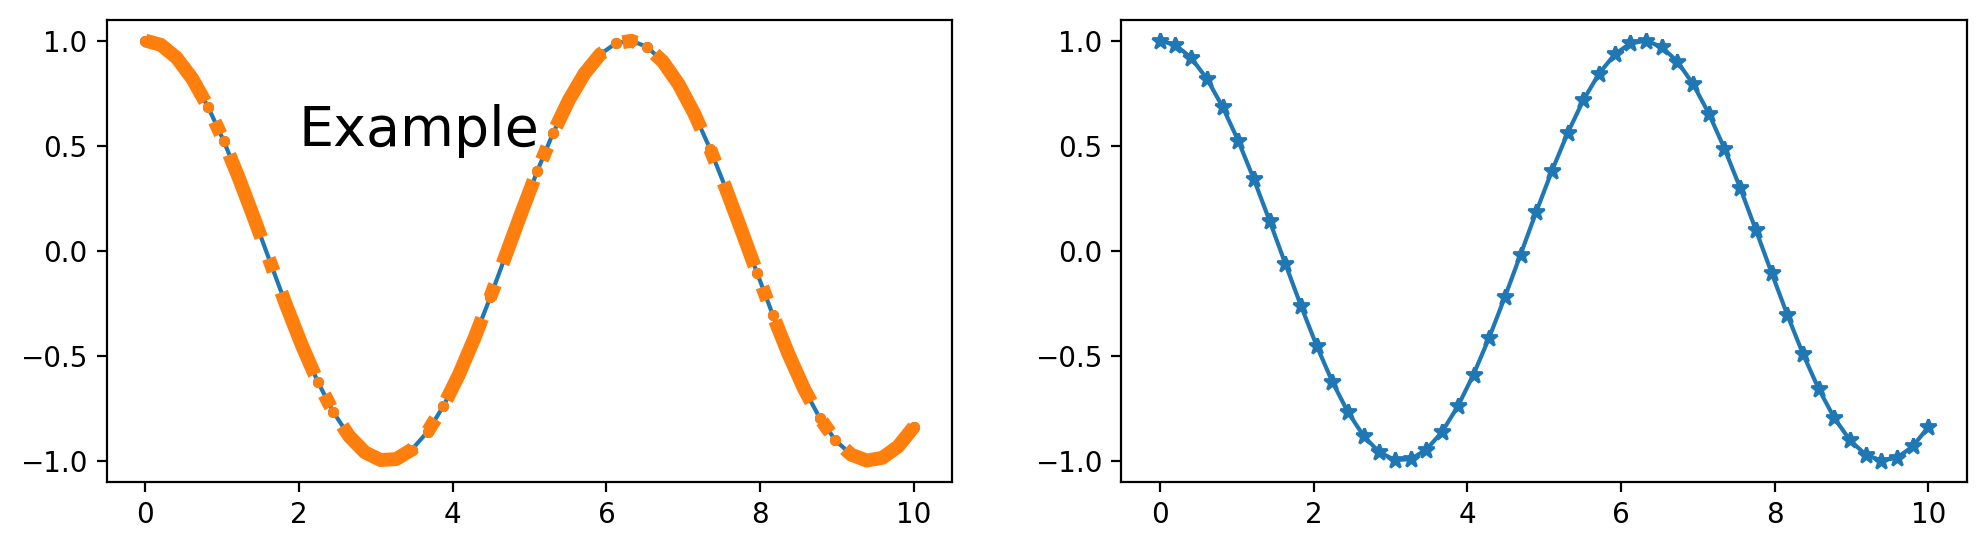

In [104]:
x = np.linspace(0, 10, 50) # num = 50
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x, y, marker='.')
axes[0].plot(x, y, marker='.', linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, 'Example', fontsize=20)
axes[1].plot(x, y, marker='*')
plt.show()
# 5/2 할일 : 한글 깨짐, font 스타일, x축 y축 라벨, 그래프 타이틀 추가